# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [10]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [27]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [28]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units ="imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']["lat"]
        city_lng = city_weather['coord']["lon"]
        city_max_temp = city_weather['main']["temp_max"]
        city_humidity = city_weather['main']["humidity"]
        city_clouds = city_weather['clouds']["all"]
        city_wind = city_weather['wind']["speed"]
        city_country = city_weather['sys']["country"]
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | shaowu
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | vostok
Processing Record 9 of Set 1 | meadow lake
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | san patricio
Processing Record 13 of Set 1 | saint george
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | hasaki
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | kaitangata
Processing Record 18 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | glen allen
Processing Record 22 of Set 1 | pevek


Processing Record 35 of Set 4 | turukhansk
Processing Record 36 of Set 4 | anshun
Processing Record 37 of Set 4 | port hedland
Processing Record 38 of Set 4 | carnarvon
Processing Record 39 of Set 4 | tuatapere
Processing Record 40 of Set 4 | thompson
Processing Record 41 of Set 4 | faya
Processing Record 42 of Set 4 | harrison
Processing Record 43 of Set 4 | vestmannaeyjar
Processing Record 44 of Set 4 | coihaique
Processing Record 45 of Set 4 | akdepe
Processing Record 46 of Set 4 | severo-kurilsk
Processing Record 47 of Set 4 | amderma
City not found. Skipping...
Processing Record 48 of Set 4 | ust-kamchatsk
City not found. Skipping...
Processing Record 49 of Set 4 | lac du bonnet
Processing Record 0 of Set 5 | santa isabel do rio negro
Processing Record 1 of Set 5 | holme
Processing Record 2 of Set 5 | kodiak
Processing Record 3 of Set 5 | pasighat
Processing Record 4 of Set 5 | north battleford
Processing Record 5 of Set 5 | walvis bay
Processing Record 6 of Set 5 | castro
Process

Processing Record 26 of Set 8 | redwater
Processing Record 27 of Set 8 | santo antonio do ica
Processing Record 28 of Set 8 | camacha
Processing Record 29 of Set 8 | norrtalje
Processing Record 30 of Set 8 | agua verde
Processing Record 31 of Set 8 | norman wells
Processing Record 32 of Set 8 | reporoa
Processing Record 33 of Set 8 | guerrero negro
Processing Record 34 of Set 8 | isla mujeres
Processing Record 35 of Set 8 | palana
Processing Record 36 of Set 8 | batagay
Processing Record 37 of Set 8 | iqaluit
Processing Record 38 of Set 8 | balimo
City not found. Skipping...
Processing Record 39 of Set 8 | banda aceh
Processing Record 40 of Set 8 | raudeberg
Processing Record 41 of Set 8 | poum
Processing Record 42 of Set 8 | imbituba
Processing Record 43 of Set 8 | sataua
City not found. Skipping...
Processing Record 44 of Set 8 | bundaberg
Processing Record 45 of Set 8 | touros
Processing Record 46 of Set 8 | leshukonskoye
Processing Record 47 of Set 8 | harper
Processing Record 48 o

Processing Record 10 of Set 12 | mapiri
Processing Record 11 of Set 12 | wilkes-barre
Processing Record 12 of Set 12 | esperance
Processing Record 13 of Set 12 | narsaq
Processing Record 14 of Set 12 | rayevskaya
Processing Record 15 of Set 12 | kollumerland
City not found. Skipping...
Processing Record 16 of Set 12 | bowen
Processing Record 17 of Set 12 | hryshkivtsi
Processing Record 18 of Set 12 | flinders
Processing Record 19 of Set 12 | tual
Processing Record 20 of Set 12 | urumqi
Processing Record 21 of Set 12 | sabang
Processing Record 22 of Set 12 | dapaong
Processing Record 23 of Set 12 | mariveles
Processing Record 24 of Set 12 | odweyne
Processing Record 25 of Set 12 | koronowo
Processing Record 26 of Set 12 | amga
Processing Record 27 of Set 12 | iturama
Processing Record 28 of Set 12 | lethbridge
Processing Record 29 of Set 12 | homer
Processing Record 30 of Set 12 | autazes
Processing Record 31 of Set 12 | sayyan
Processing Record 32 of Set 12 | taoudenni
Processing Recor

In [29]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df = city_data_df[["City","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed", "Date"]]

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Date          552
dtype: int64

In [30]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,shaowu,27.3409,117.4831,64.45,66,96,2.37,1675325363
1,avarua,-21.2078,-159.7750,73.45,94,20,9.22,1675324833
2,ushuaia,-54.8000,-68.3000,47.86,87,0,3.44,1675324506
3,butaritari,3.0707,172.7902,80.67,78,100,20.71,1675324857
4,hermanus,-34.4187,19.2345,71.80,65,5,8.66,1675324814


In [31]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [32]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City_ID,,,,,,,,
0,shaowu,27.3409,117.4831,64.45,66,96,2.37,1675325363
1,avarua,-21.2078,-159.7750,73.45,94,20,9.22,1675324833
2,ushuaia,-54.8000,-68.3000,47.86,87,0,3.44,1675324506
3,butaritari,3.0707,172.7902,80.67,78,100,20.71,1675324857
4,hermanus,-34.4187,19.2345,71.80,65,5,8.66,1675324814


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [33]:
plt.scatter?

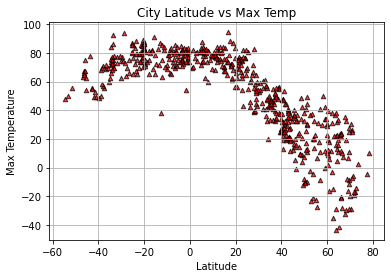

In [34]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker ='^', s=20, c='r', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs Max Temp')
plt.ylabel('Max Temperature')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

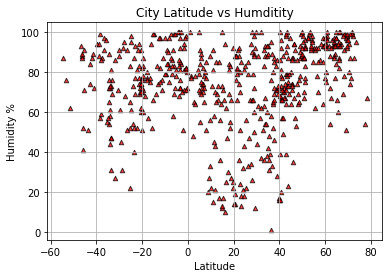

In [35]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker ='^', s=20, c='r', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs Humditity')
plt.ylabel('Humidity %')
plt.xlabel('Latitude')
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

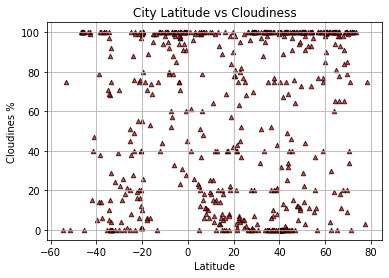

In [36]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker ='^', s=20, c='r', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs Cloudiness')
plt.ylabel('Cloudines %')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

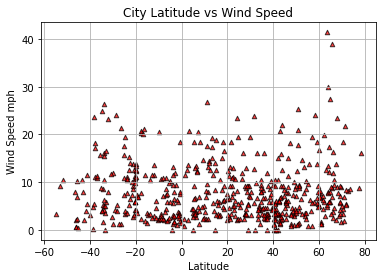

In [37]:
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker ='^', s=20, c='r', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs Wind Speed')
plt.ylabel('Wind Speed mph')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


y = -0.71x + 64.48
The r-squared is: 0.602115554512223


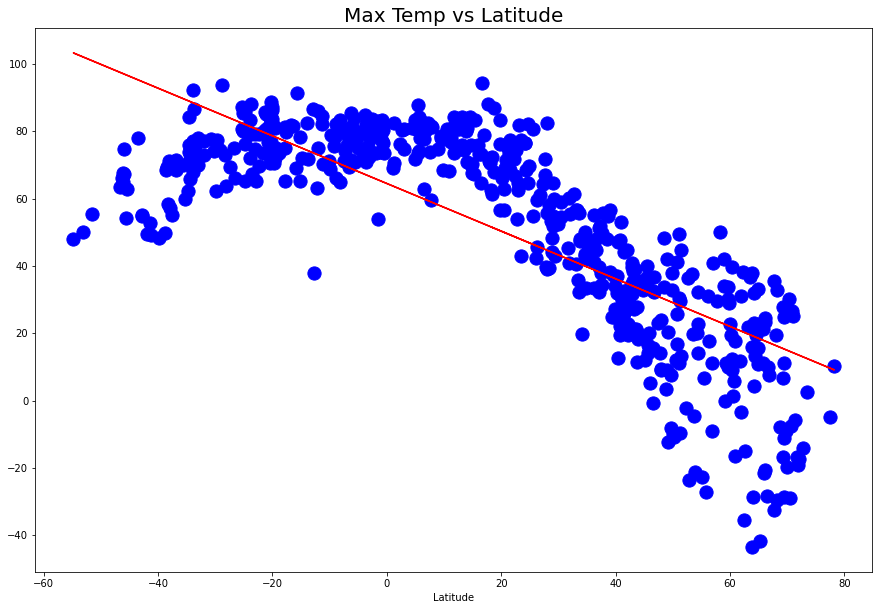

In [56]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)



# Add the linear regression equation and line to plot
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_values,y_values,s=175, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title('Max Temp vs Latitude',fontsize =20)
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('',fontsize =10)


print(f"The r-squared is: {rvalue**2}")

In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi = city_data_df[city_data_df["Lat"]>=0]
northern_hemi_df = pd.DataFrame(northern_hemi)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City_ID,,,,,,,,
0,shaowu,27.3409,117.4831,64.45,66,96,2.37,1675325363
3,butaritari,3.0707,172.7902,80.67,78,100,20.71,1675324857
7,vostok,46.4856,135.8833,-0.83,94,100,11.25,1675324916
8,meadow lake,34.8014,-106.5436,33.40,42,0,7.96,1675325367
11,san patricio,28.0170,-97.5169,39.07,90,100,8.75,1675325021


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi = city_data_df[city_data_df["Lat"]<0]
southern_hemi_df = pd.DataFrame(southern_hemi)


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City_ID,,,,,,,,
1,avarua,-21.2078,-159.7750,73.45,94,20,9.22,1675324833
2,ushuaia,-54.8000,-68.3000,47.86,87,0,3.44,1675324506
4,hermanus,-34.4187,19.2345,71.80,65,5,8.66,1675324814
5,mataura,-46.1927,168.8643,67.55,88,100,2.10,1675324791
6,rikitea,-23.1203,-134.9692,79.12,69,0,15.37,1675324831


###  Temperature vs. Latitude Linear Regression Plot

y = -1.33x + 91.08
The r-squared is: 0.7484167943893903


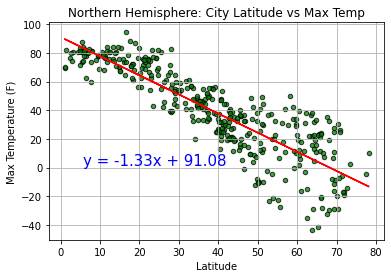

In [41]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values, marker ='o', s=20, c='green', edgecolors='black', alpha=0.75)
plt.title('Northern Hemisphere: City Latitude vs Max Temp')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation_line,(5.8,2), fontsize=15, color='b')
plt.show()


y = 0.32x + 80.87
The r-squared is: 0.2099844709716728


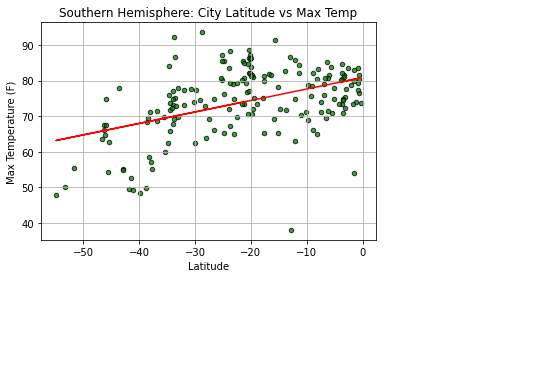

In [42]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values, marker ='o', s=20, c='green', edgecolors='black', alpha=0.75)
plt.title('Southern Hemisphere: City Latitude vs Max Temp')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation_line,(5.8,2), fontsize=15, color='b')
plt.show()


**Discussion about the linear relationship:** For northern hemisphere, there is moderate relationship between Max Temp and Latitude of r value of 0.75.
Southern hemisphere, this is none or very weak relationship between Max Temp and Latitude value of r value of 0.21

### Humidity vs. Latitude Linear Regression Plot

y = 0.5x + 53.64
The r-squared is: 0.17231127270004423


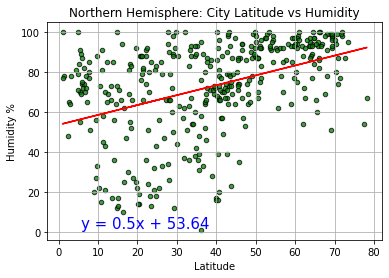

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values, marker ='o', s=20, c='green', edgecolors='black', alpha=0.75)
plt.title('Northern Hemisphere: City Latitude vs Humidity')
plt.ylabel('Humidity %')
plt.xlabel('Latitude')
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation_line,(5.8,2), fontsize=15, color='b')
plt.show()


y = 0.27x + 82.08
The r-squared is: 0.05476195873190834


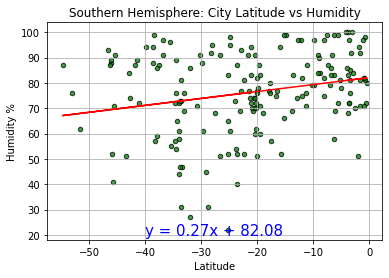

In [55]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values, marker ='o', s=20, c='green', edgecolors='black', alpha=0.75)
plt.title('Southern Hemisphere: City Latitude vs Humidity')
plt.ylabel('Humidity %')
plt.xlabel('Latitude')
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation_line,(-40,20), fontsize=15, color='b')
plt.show()


**Discussion about the linear relationship:** There is none or very weak relationship between the Latitude and Humidity based on the determined r-value for both southern and northern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.58x + 35.14
The r-squared is: 0.07577677756314309


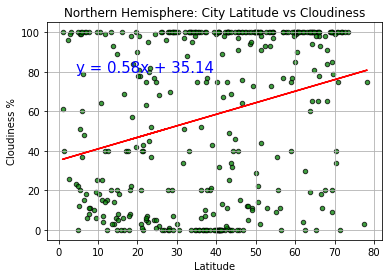

In [53]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values, marker ='o', s=20, c='green', edgecolors='black', alpha=0.75)
plt.title('Northern Hemisphere: City Latitude vs Cloudiness')
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation_line,(4.5,80), fontsize=15, color='b')
plt.show()


y = 0.92x + 81.07
The r-squared is: 0.1076131047909524


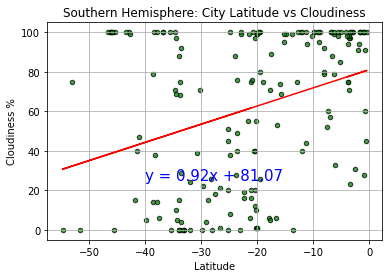

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values, marker ='o', s=20, c='green', edgecolors='black', alpha=0.75)
plt.title('Southern Hemisphere: City Latitude vs Cloudiness')
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation_line,(-40,25), fontsize=15, color='b')
plt.show()


**Discussion about the linear relationship:** There is none or very weak relationship between the Latitude and Cloudiness based on the determined r-value for both southern and northern hemisphere. There are large number outliers in the cloudiness dataset.

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.01x + 7.35
The r-squared is: 0.0011100942726752843


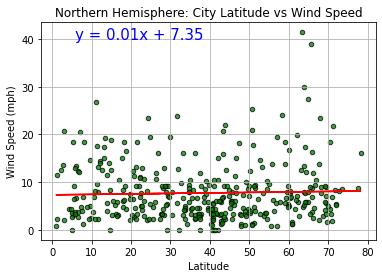

In [50]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values, marker ='o', s=20, c='green', edgecolors='black', alpha=0.75)
plt.title('Northern Hemisphere: City Latitude vs Wind Speed')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation_line,(5.8,40), fontsize=15, color='b')
plt.show()


y = -0.06x + 6.66
The r-squared is: 0.019800320719521272


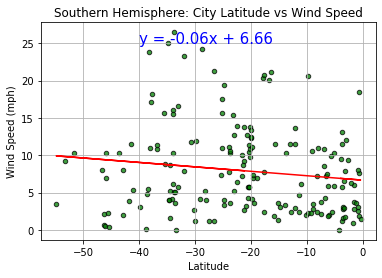

In [51]:
# Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values, marker ='o', s=20, c='green', edgecolors='black', alpha=0.75)
plt.title('Southern Hemisphere: City Latitude vs Wind Speed')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation_line,(-40,25), fontsize=15, color='b')
plt.show()


**Discussion about the linear relationship:** There is none or very weak relationship between the Latitude and Wind Speed based on the determined r-value for both southern and northern hemisphere. 